In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
import pathlib

# Replace 'path/to/local_directory' with the path to your local directory containing the dataset
data_dir = pathlib.Path('data')

# Verify that the specified directory exists
if not data_dir.exists():
    raise FileNotFoundError(f"Directory '{data_dir}' not found. Please provide the correct path.")

# If you have downloaded and extracted the dataset manually, you can specify the path to it directly
# data_dir = pathlib.Path('/path/to/extracted/dataset/flower_photos')

# You can proceed with the rest of your code, such as data preprocessing, data loading, etc.


data\NormalSkin\Normal_Skin.png


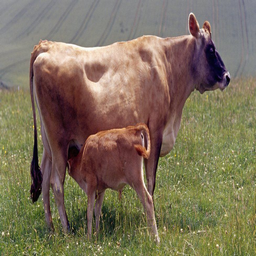

In [3]:
NormalSkin = list(data_dir.glob('NormalSkin/*'))
print(NormalSkin[0])
PIL.Image.open(str(NormalSkin[0]))

In [4]:
img_height,img_width=180,180
batch_size=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 640 files belonging to 2 classes.
Using 512 files for training.


In [5]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 640 files belonging to 2 classes.
Using 128 files for validation.


In [6]:
class_names = train_ds.class_names
print(class_names)

['LumpySkin', 'NormalSkin']


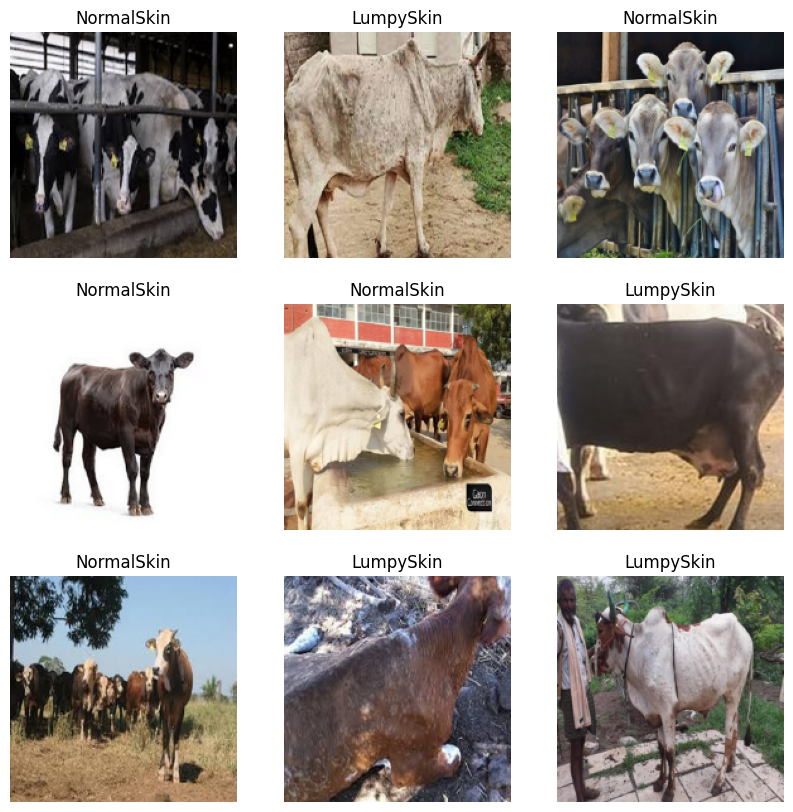

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [8]:
num_classes = 2
model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, activation='softmax')
])

C:\Users\Deepali\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:18: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [9]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [10]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10


C:\Users\Deepali\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\backend\tensorflow\nn.py:625: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


16/16 ━━━━━━━━━━━━━━━━━━━━ 12s 594ms/step - accuracy: 0.5342 - loss: 1.4330 - val_accuracy: 0.7812 - val_loss: 0.6190
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 11s 661ms/step - accuracy: 0.8066 - loss: 0.5551 - val_accuracy: 0.7109 - val_loss: 0.5359
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 20s 605ms/step - accuracy: 0.8613 - loss: 0.3900 - val_accuracy: 0.8125 - val_loss: 0.4871
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 10s 595ms/step - accuracy: 0.8823 - loss: 0.3328 - val_accuracy: 0.7656 - val_loss: 0.5524
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 10s 599ms/step - accuracy: 0.8948 - loss: 0.2767 - val_accuracy: 0.7812 - val_loss: 0.5250
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 10s 588ms/step - accuracy: 0.9213 - loss: 0.2173 - val_accuracy: 0.7891 - val_loss: 0.6101
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 11s 642ms/step - accuracy: 0.9447 - loss: 0.1584 - val_accuracy: 0.8047 - val_loss: 0.6408
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 11s 606ms/step - accuracy: 0.9702 - loss: 0.0966 - val_accuracy: 0.789

In [13]:
import numpy as np
from PIL import Image

def preprocess_image(img):
    # Resize the image to the desired dimensions
    img = Image.fromarray(img)
    img_resized = img.resize((180, 180))
    # Convert the image back to a NumPy array
    img_array = np.array(img_resized)
    return img_array

def predict_image(img):
    
    # Preprocess the input image
    img_preprocessed = preprocess_image(img)
    # Reshape the preprocessed image
    img_4d = img_preprocessed.reshape(-1, 180, 180, 3)
    # Make prediction using the model
    prediction = model.predict(img_4d)[0]
    # Get the index of the label with the highest probability
    max_index = np.argmax(prediction)
    # Get the label name corresponding to the max index
    max_label = class_names[max_index]
    return max_label
    

# Example usage:
# Replace `your_image_array` with the actual image array you want to predict on
# prediction_result = predict_image(your_image_array)


In [14]:
from tensorflow.keras.models import load_model

In [15]:
model.save(os.path.join('models','LumpyDetection.h5'))

In [16]:
!pip install gradio

In [17]:
import gradio as gr

In [18]:
#image = gr.inputs.Image(shape=(180,180))
#label = gr.outputs.Label(num_top_classes=5)

iface=gr.Interface(fn=predict_image, inputs='image', outputs='text')
iface.launch()

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
